In [221]:
import numpy as np
import pandas as pd
import random
import matplotlib as mpl
%matplotlib inline

#pd.__version__

In [222]:
# df = pd.read_csv('/Users/askuksa/Google Drive/ПРОЕКТЫ/ВРАБОТЕ/!20190900 Sorcerr Email Generator LeadList/\
# Email DB & parser workings/python mapping templates/30к_step_02 - step_02.csv')

# #                  , dtype={"template":"category"} )

filepath = '/Users/askuksa/Google Drive/ПРОЕКТЫ/ВРАБОТЕ/!20190900 Sorcerr Email Generator LeadList/Email DB & parser \
workings/python mapping templates/2021-03-02_test_01.csv_step-02 - 2021-03-02_test_01.csv_step-02.csv'

# filepath = '/Users/askuksa/Google Drive/ПРОЕКТЫ/ВРАБОТЕ/!20190900 Sorcerr Email Generator LeadList/Email DB & parser workings\
# /python mapping templates/2021-03-02_test_02.csv_step-02 - 2021-03-02_test_02.csv_step-02.csv'

# filepath = '/Users/askuksa/Google Drive/ПРОЕКТЫ/ВРАБОТЕ/!20190900 Sorcerr Email Generator LeadList/Email DB & parser workings\
# /python mapping templates/2021-03-02_test_03.csv_step-02 - 2021-03-02_test_03.csv_step-02.csv'

df = pd.read_csv(filepath)


In [223]:
#сортируем по домену потом по весу по убыванию, убіваем колонку "id", ситаем строки и уникальные домены
#df.sort_values(['domain', 'weight'], ascending = [True, False], inplace = True)
df.drop(columns=['id'], inplace= True)
df['domain'].apply(['count', 'size', 'nunique'])

count      50072
size       50072
nunique    10000
Name: domain, dtype: int64

In [224]:
#частоты для референтого домена 80 из 100
reference_domain = np.array([.8, .06, .05, .05, .02, .01, .01]).cumsum()
N_emails_per_domain = 10

#функция для расчета меры отличия от референтного домена - аналог теста Колм-Смирн
def good_of_fit(series, n_emails = N_emails_per_domain, vec_ref_domain = reference_domain):
    vect = (series.to_numpy() / n_emails).cumsum()
    
    if len(vect) > len(vec_ref_domain):
        vec_ref_domain = np.append(vec_ref_domain, np.ones(len(vect) - len(vec_ref_domain),))
    
    if len(vect) < len(vec_ref_domain):
        vect = np.append(vect, np.ones(- len(vect) + len(vec_ref_domain),))

    return np.absolute(vec_ref_domain - vect).sum()

In [225]:
grouped = df.groupby('domain', sort = False) 

#проверяем суммы весов по каджому домену
grouped['weight'].apply(sum).describe()

count    1.000000e+04
mean     5.000000e+00
std      3.364712e-16
min      5.000000e+00
25%      5.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: weight, dtype: float64

In [226]:
#добавляем колонку с максимальным весом для каждого домена и сортируем домены в порядке убывания макс веса и пр
df['max_weight'] = grouped['weight'].transform(max)

#добавим колонку с мерой похожести на референтное распределение (чем меньше мера - тем больше сходство)
df['good_of_fit'] = grouped['weight'].transform(good_of_fit)

#сортируем
df.sort_values(['max_weight', 'domain', 'weight', 'template'], ascending = [False, True, False, False]\
                     , inplace = True)

In [227]:
#смотрим хвост 25
df.tail(25)

,domain,template,weight,max_weight,good_of_fit
47797,wlnet.com,<last>@<domain>,1.0000,1.0,3.55000
47799,wlnet.com,<f><last>@<domain>,1.0000,1.0,3.55000
47800,wlnet.com,<Nomatch>,1.0000,1.0,3.55000
47802,wlnet.com,<first>_<last>@<domain>,0.5000,1.0,3.55000
47801,wlnet.com,<first>-<last>@<domain>,0.5000,1.0,3.55000
48215,wub.de,<noise>,1.0000,1.0,3.55000
48218,wub.de,<first>@<domain>,1.0000,1.0,3.55000
48217,wub.de,<f><last>@<domain>,1.0000,1.0,3.55000
48216,wub.de,<f>.<last>@<domain>,1.0000,1.0,3.55000
48220,wub.de,<last><first>@<domain>,0.5000,1.0,3.55000


In [228]:
#смотрим на 5 случайно выбранных доменов
sample_5_domains = random.sample( list(df['domain'].unique()), 5)
df[ df['domain'].isin(sample_5_domains) ]

,domain,template,weight,max_weight,good_of_fit
49768,ziemke.com,<first>@<domain>,4.8000,4.8,0.84000
49769,ziemke.com,<last>@<domain>,0.2000,4.8,0.84000
21212,isshinryu-is-life.com,<noise>,3.0000,3.0,1.44000
21213,isshinryu-is-life.com,<reserved>,1.0000,3.0,1.44000
21214,isshinryu-is-life.com,<last>@<domain>,1.0000,3.0,1.44000
14849,gpxs.net,<first>.<last>@<domain>,2.5000,2.5,3.00462
14850,gpxs.net,<first>@<domain>,0.9000,2.5,3.00462
14851,gpxs.net,<Nomatch>,0.8000,2.5,3.00462
14852,gpxs.net,<first><last>@<domain>,0.6769,2.5,3.00462
14853,gpxs.net,<last>@<domain>,0.1000,2.5,3.00462


In [229]:
#ЗАфильтруем домены с максимальным весов > x
#были разные резлуьтаты со строкой ниже, почему? 
# df[ grouped['weight'].transform(max) >= 5.1 ].describe(include = 'all')
#видимо баг, он ушел, когда добавил sort = False в первом df.groupby()

df_good_domains= df[ df['max_weight'] >= 2.]
df_good_domains.describe(include = 'all')

,domain,template,weight,max_weight,good_of_fit
count,32478,32478,32478.000000,32478.000000,32478.000000
unique,7639,33,NaN,NaN,NaN
top,idealstone.ru,<Nomatch>,NaN,NaN,NaN
freq,14,4540,NaN,NaN,NaN
mean,NaN,NaN,1.176027,2.786259,2.945675
std,NaN,NaN,1.261809,0.815271,1.675541
min,NaN,NaN,0.016500,2.000000,0.600000
25%,NaN,NaN,0.187500,2.062500,1.520000
50%,NaN,NaN,0.762500,2.600000,2.389600
75%,NaN,NaN,1.934000,3.062500,4.572500


In [230]:
# #filter domain groups that contain at least one 'noise'
# filtered[ filtered.groupby('domain')['template'].transform(lambda \
#                                             x: pd.Series.any(x.str.contains("<noise>")))]

In [231]:
# найдем домены, где максимальный вес имеют <noise> или <Nomatch> 
Max_noise_or_Nomatch = df_good_domains.groupby('domain')\
                .filter(lambda x: ("<noise>" in x.loc[ x['weight'].idxmax(), 'template' ] )\
                | ("<Nomatch>" in x.loc[ x['weight'].idxmax(), 'template' ]))
#считаем такие домены
Max_noise_or_Nomatch['domain'].apply(['nunique', 'count', 'size'])

nunique    1727
count      9173
size       9173
Name: domain, dtype: int64

In [232]:
#удалим домены Max_noise_or_Nomatch из df_good_domains
df_good_domains= df_good_domains.drop( Max_noise_or_Nomatch.index )
df_good_domains.describe(include='all')

,domain,template,weight,max_weight,good_of_fit
count,23305,23305,23305.000000,23305.000000,23305.000000
unique,5912,33,NaN,NaN,NaN
top,cevians.com,<last>@<domain>,NaN,NaN,NaN
freq,13,3381,NaN,NaN,NaN
mean,NaN,NaN,1.268397,2.889064,2.597231
std,NaN,NaN,1.307301,0.846233,1.472943
min,NaN,NaN,0.016500,2.000000,0.600000
25%,NaN,NaN,0.300000,2.076900,1.420000
50%,NaN,NaN,0.900000,2.762500,2.080000
75%,NaN,NaN,2.000000,3.500000,4.268750


In [254]:
#найдем домены, где несколько темплейтов (>1) имеют веса больший порога x = 2.
#df_tmp = df_good_domains[ df_good_domains['weight'] >= 2. ]

df_tmp = df_good_domains[ df_good_domains['weight'] >= 2. ]\
            .groupby('domain').filter(lambda x: x['domain'].count() > 1)

In [261]:
#выборосим эти домены из ннашего ДФ и получим финальных ДФ
df_good_domains = df_good_domains[ ~df_good_domains['domain'].isin(df_tmp['domain'].unique()) ]
df_good_domains.describe(include = 'all')

,domain,template,weight,max_weight,good_of_fit
count,22236,22236,22236.000000,22236.000000,22236.00000
unique,5589,33,NaN,NaN,NaN
top,siz66.ru,<last>@<domain>,NaN,NaN,NaN
freq,13,3256,NaN,NaN,NaN
mean,NaN,NaN,1.256746,2.915985,2.62809
std,NaN,NaN,1.321477,0.854143,1.48113
min,NaN,NaN,0.016500,2.000000,0.60000
25%,NaN,NaN,0.300000,2.095500,1.42750
50%,NaN,NaN,0.900000,2.800000,2.09693
75%,NaN,NaN,2.000000,3.600000,4.29875


In [253]:
# #найдем домены, где есть несколько темплейтов с макс весом и посмотрим на распределение   

# # находим в ориг ДФ все строки с макс весом и копируем строки в новый ДФ 
# maxweights_df = df[ df['max_weight'] == df['weight'] ].copy()
# #создаем новый столбец с количеством строк, содержащих макс вес для каждого домена
# maxweights_df['count_of_domains'] = maxweights_df.groupby('domain')['domain'].transform('count')
# #смотрим распределение
# maxweights_df.groupby('count_of_domains')['domain'].nunique()
# #maxweights_df[ maxweights_df['count_of_domains'] == 5]

In [260]:
# #покрутим посмотрим меру похожести на референтный домен
# df_good_domains.sort_values(['good_of_fit', 'domain', 'weight', 'template'], \
#                                         ascending = [True, True, False, False]\
#                                         , inplace = False).tail(45)

#смотрим на 5 случайно выбранных доменов
sample_5_domains = random.sample( list(df_good_domains['domain'].unique()), 5)
df_good_domains[ df_good_domains['domain'].isin(sample_5_domains) ]

,domain,template,weight,max_weight,good_of_fit
40566,servware.com,<first>@<domain>,4.6000,4.6000,0.8600
40567,servware.com,<last>@<domain>,0.4000,4.6000,0.8600
24066,knapchuck.com,<first>@<domain>,4.5000,4.5000,0.8700
24067,knapchuck.com,<last>@<domain>,0.5000,4.5000,0.8700
6750,davison.k12.mi.us,<f><last>@<domain>,3.0955,3.0955,4.4092
6751,davison.k12.mi.us,<l><first>@<domain>,1.0295,3.0955,4.4092
6752,davison.k12.mi.us,<Nomatch>,0.5000,3.0955,4.4092
6758,davison.k12.mi.us,<last>@<domain>,0.0625,3.0955,4.4092
6757,davison.k12.mi.us,<last><first>@<domain>,0.0625,3.0955,4.4092
6753,davison.k12.mi.us,<last><f>@<domain>,0.0625,3.0955,4.4092


In [213]:
from scipy.stats import hypergeom
import matplotlib.pyplot as plt

In [214]:
#np.array([.8, .06, .05, .05, .02, .01, .01]).cumsum()

In [215]:
#иедальный корпоративный домен: 100 имейлов из которых 80 сфоримрованы по шаблону. N - размер нашей выборки, 
#колво имейлов на одном домене 
M, n = 100, 80
xLimit = 13
index095 = np.zeros((xLimit,))

for size in np.arange(xLimit):    
    rv = hypergeom(M, n, size)
    x = np.arange(0, size + 1)
    pmf = rv.pmf(x)
    index095[size] = len(pmf) - 1 - np.where(pmf[::-1].cumsum() > .95)[0][0]

In [216]:
print("array: ", index095, "\n" + "with size:", len(index095))

array:  [0. 0. 1. 1. 2. 2. 3. 4. 5. 5. 6. 7. 7.] 
with size: 13


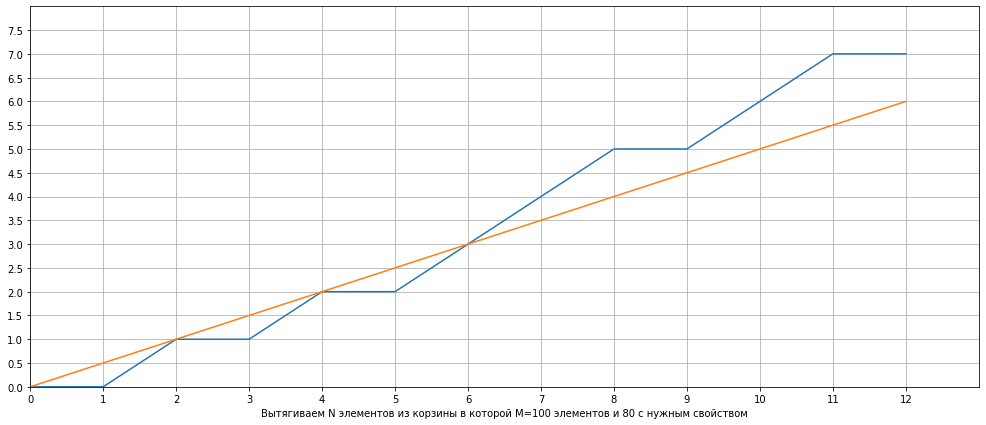

In [217]:
plot_x = np.arange(0, xLimit)

fig = plt.figure(figsize=(17, 7))
ax = fig.add_subplot(111)

ax.set_ylim(top = index095[xLimit - 1] + 1)
ax.set_xlim(right = xLimit)

ax.set_yticks( np.arange(0, index095[xLimit - 1] + 1, .5) )
ax.set_xticks( plot_x )
ax.grid(which='both')

ax.plot(plot_x, index095, plot_x/2)

#ax.vlines(x, 0, index095, lw=2)
ax.set_xlabel('Вытягиваем N элементов из корзины в которой M=100 элементов и 80 с нужным свойством')
#ax.set_ylabel('hypergeom PMF')
plt.show()

In [218]:
#массив частот
for i, v in enumerate(pmf):
    print(i, " -> ", v)

0  ->  1.1992333918601576e-10
1  ->  1.2791822846508377e-08
2  ->  5.558047026807888e-07
3  ->  1.3137202063364108e-05
4  ->  0.0001896683547898202
5  ->  0.001774128610957082
6  ->  0.011088303818481764
7  ->  0.04688768471815155
8  ->  0.13370316345410407
9  ->  0.2516765429724306
10  ->  0.29781724251737685
11  ->  0.19949480360015612
12  ->  0.057354756035045064


In [267]:
#dir()

In [266]:
help('modules')


Please wait a moment while I gather a list of all available modules...



/opt/anaconda3/lib/python3.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
/opt/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/opt/anaconda3/lib/python3.7/site-packages/nltk/twitter/__init__.py:22: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  "The twython library has not been installed. "


DEBUG:pip._internal.vcs.versioncontrol:Registered VCS backend: bzr
DEBUG:pip._internal.vcs.versioncontrol:Registered VCS backend: git
DEBUG:pip._internal.vcs.versioncontrol:Registered VCS backend: hg
DEBUG:pip._internal.vcs.versioncontrol:Registered VCS backend: svn


/opt/anaconda3/lib/python3.7/site-packages/skimage/novice/__init__.py:103: UserWarning:

The `skimage.novice` module was deprecated in version 0.14. It will be removed in 0.16.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.

/opt/anaconda3/lib/python3.7/site-packages/qtawesome/iconic_font.py:301: UserWarning:

You need to have a running QApplication to use QtAwesome!



Crypto              brain_hashlib       ipywidgets          queue
Cython              brain_http          isort               quopri
IPython             brain_io            isympy              random
OpenSSL             brain_mechanize     itertools           re
PIL                 brain_multiprocessing itsdangerous        readline
PyQt5               brain_namedtuple_enum jdcal               reprlib
__future__          brain_nose          jedi                requests
_abc                brain_numpy_core_fromnumeric jinja2              resource
_ast                brain_numpy_core_function_base joblib              retrying
_asyncio            brain_numpy_core_multiarray json                rlcompleter
_bisect             brain_numpy_core_numeric json5               rmagic
_blake2             brain_numpy_core_numerictypes jsonschema          rope
_bootlocale         brain_numpy_core_umath jupyter             ruamel_yaml
_bz2                brain_numpy_ndarray jupyter_client      runpy
_

/opt/anaconda3/lib/python3.7/pkgutil.py:107: VisibleDeprecationWarning:

zmq.eventloop.minitornado is deprecated in pyzmq 14.0 and will be removed.
    Install tornado itself to use zmq with the tornado IOLoop.
    

